## sigmoid 
### w변화에 따라 그래프가 어떻게 변화하는지

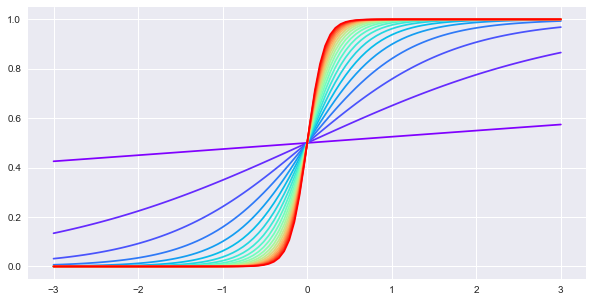

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')

x = np.linspace(-3,3,100)

n_w = 20
w_list = np.linspace(0.1,10,n_w)
cmap=cm.get_cmap('rainbow',lut=n_w)

fig, ax = plt.subplots(figsize=(10,5))
for w_idx, w in enumerate(w_list):
    z = x*w
    sigmoid =1/(1+np.exp(-z))
    ax.plot(x,sigmoid,color=cmap(w_idx))
    

#### 보라색이 w = 0.1
#### 빨간색이 w = 10

### b변화에 따라 그래프가 어떻게 변화하는지

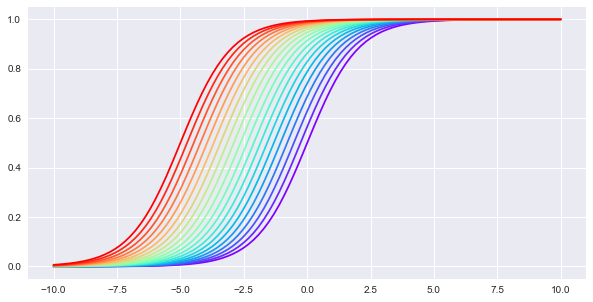

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')

x = np.linspace(-10,10,100)

n_b = 20
w=1
b_list = np.linspace(0,5,n_b)
cmap=cm.get_cmap('rainbow',lut=n_b)

fig, ax = plt.subplots(figsize=(10,5))
for w_idx, b in enumerate(b_list):
    z = x*w+b
    sigmoid =1/(1+np.exp(-z))
    
    ax.plot(x,sigmoid,color=cmap(w_idx))
    


## logistic (1_feature)

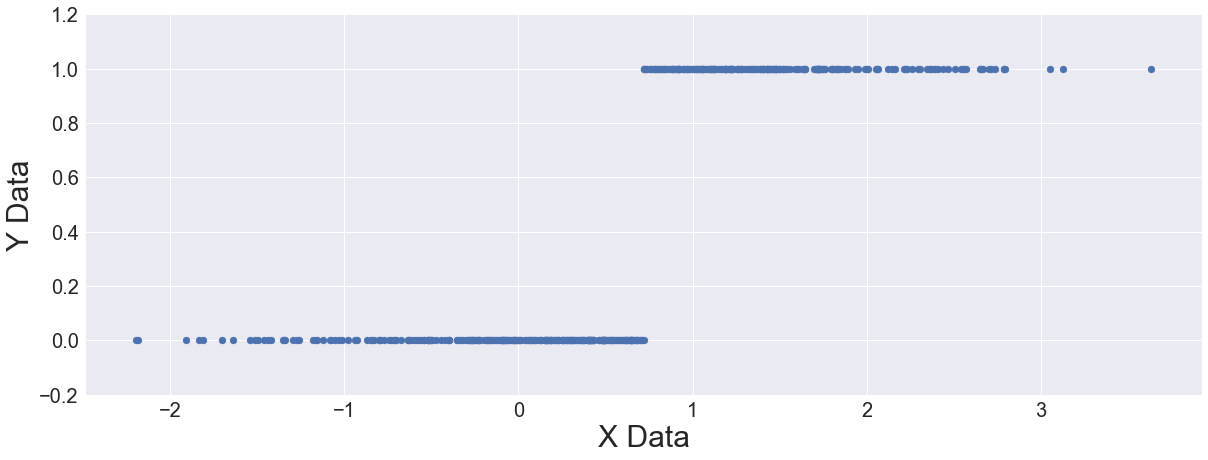

In [22]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data = 500
lr = 0.1
t_w, t_b = 5, -3
w, b = np.random.uniform(-3, 3, 2) # initial weight, bias

# generate dataset
t_decision_boundary = -t_b/t_w
x_data = np.random.normal(t_decision_boundary, 1,(n_data, ))
y_data = x_data * t_w + t_b
y_data = (y_data > t_decision_boundary).astype(np.float32)

# visualize dataset
cmap = plt.get_cmap('rainbow', lut=n_data)
fig, ax = plt.subplots(figsize=(20, 7))
ax.scatter(x_data, y_data)
ax.set_xlabel('X Data', fontsize=30)
ax.set_ylabel('Y Data', fontsize=30)
ax.tick_params(labelsize=20)
ax.set_ylim([-0.2, 1.2])

# set x range for visualization of model
x_range = np.linspace(-2, 4, 100)

In [23]:
# train model and visualize updated model
J_track = list()
w_track, b_track = list(), list()

for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    
    w_track.append(w)
    b_track.append(b)
 
    # visualize updated model
    y_range = w*x_range + b
    y_range = 1/(1 + np.exp(-y_range))
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.3)
 
    # loss calculation
    pred = x*w + b
    pred = 1/(1 + np.exp(-pred))
    J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
    J_track.append(J)
 
    # jacobians
    dJ_dpred = (pred - y)/(pred*(1-pred))
    dpred_dz = pred*(1-pred)
    dz_dw = x
    dz_db = 1
 
    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dw = dJ_dz * dz_dw
    dJ_db = dJ_dz * dz_db
 
    # train model
    w = w - lr*dJ_dw
    b = b - lr*dJ_db


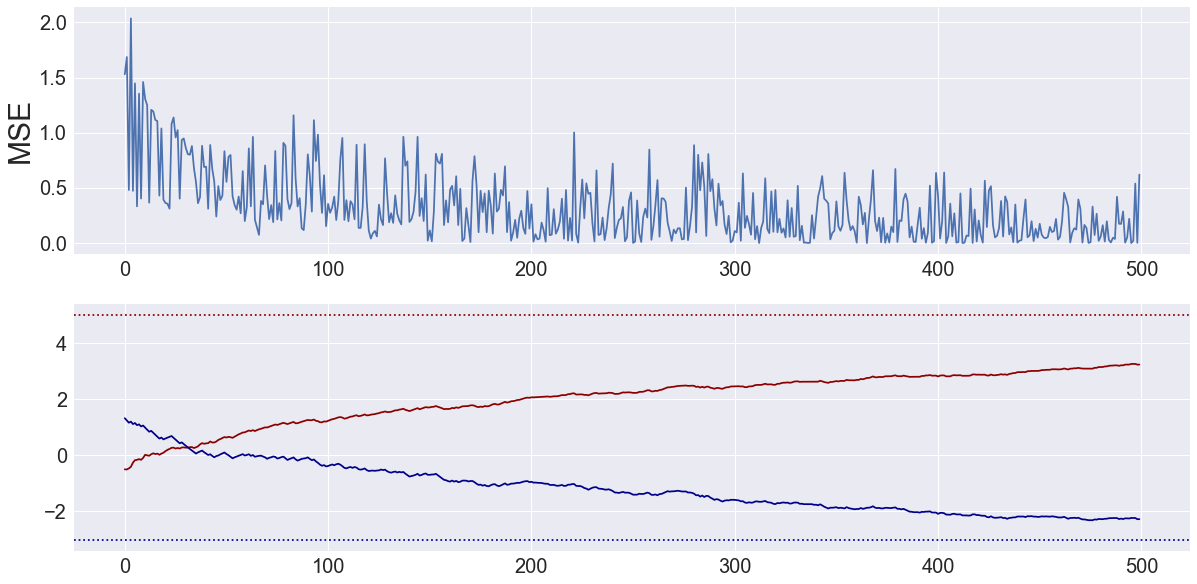

In [24]:
# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=20)

## logistic (n_feature)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')
# set params

n_data, n_feature = 1000, 3
lr = 0.03
t_W = np.random.uniform(-1, 1, (n_feature, 1)) # target weights
t_b = np.random.uniform(-1, 1, (1, )) # target bias
W = np.random.uniform(-1, 1, (n_feature, 1)) # initial weights
b = np.random.uniform(-1, 1, (1, )) # initial biass

# generate dataset
x_data = np.random.randn(n_data, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1/(1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(np.int)
J_track, acc_track = list(), list()
n_correct = 0

In [11]:
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
 # train model
 pred = X @ W + b
 pred = 1/(1 + np.exp(-pred))
 J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
 J_track.append(J)

 pred_ = (pred > 0.5).astype(np.int)
 if pred_ == y:
    n_correct += 1
 acc_track.append(n_correct/(data_idx + 1))

 # jacobians
 dJ_dpred = (pred - y)/(pred*(1-pred))
 dpred_dz = pred*(1-pred)
 dz_dW = X.reshape(1, -1)
 dz_db = 1
 
 # backpropagation
 dJ_dz = dJ_dpred * dpred_dz
 dJ_dW = dJ_dz * dz_dW
 dJ_db = dJ_dz * dz_db
 
 # train model
 W = W - lr*dJ_dW.T
 b = b - lr*dJ_db

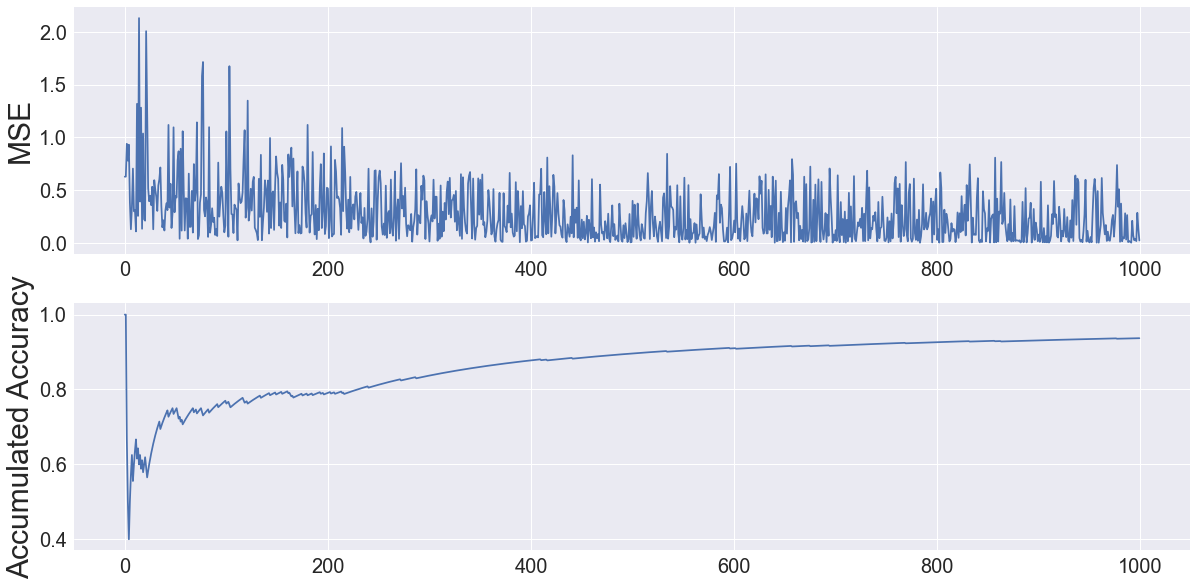

In [12]:
# visualize weight/bias
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated Accuracy', fontsize=30)
axes[1].tick_params(labelsize=20)